In [4]:
# created by zayaan. going to test using a basic neural network for the stuff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#we want to create a neural network, so we need to import the keras library
from keras.models import Sequential
import tensorflow as tf
from sklearn.ensemble import IsolationForest

In [5]:
csv_file = "500k.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
u = df['u']
g = df['g']
r = df['r']
i = df['i']
z = df['z']

# color indices
u_g = u - g
g_r = g - r
r_i = r - i
i_z = i - z

# Effective temperature of star
temperature = df['Teff']

metallicity = df['FeH']

color_filters_df = pd.DataFrame()
color_filters_df['u_g'] = u_g
color_filters_df['g_r'] = g_r
color_filters_df['r_i'] = r_i
color_filters_df['i_z'] = i_z

# Effective temperature of star
color_filters_df['temperature'] = df['Teff']
color_filters_df['metallicity'] = df['FeH']
print(df.shape)

(500000, 7)


In [6]:
df = df[~(df == -9999).any(axis=1)]

In [7]:
print(df.shape)

(499984, 7)


In [5]:
#iterate thru temperature,
#if its 4353, print out the corresponding color filters
# for i in range(len(temperature)):
#     if color_filters_df.iloc[i]['u_g'] > 10:
#         #print temperature
#         print("Temp: ", color_filters_df.iloc[i][''])
#         print("u_g: ", color_filters_df.iloc[i]['u_g'])


In [6]:
# # remove outliers by removing all data points that are outside 25th percentile - 75th percentile range
# dropped_rows = set()

# # TEMPERATURE OUTLIERS    
# Q1_temp = color_filters_df['temperature'].quantile(0.25)
# Q3_temp = color_filters_df['temperature'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['temperature']>=upper)[0]
# lower_array = np.where(color_filters_df['temperature']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)

# # U_G OUTLIERS
# Q1_temp = color_filters_df['u_g'].quantile(0.25)
# Q3_temp = color_filters_df['u_g'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['u_g']>=upper)[0]
# lower_array = np.where(color_filters_df['u_g']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)
    
# # G_R OUTLIERS
# Q1_temp = color_filters_df['g_r'].quantile(0.25)
# Q3_temp = color_filters_df['g_r'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['g_r']>=upper)[0]
# lower_array = np.where(color_filters_df['g_r']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)
    
# # R_I OUTLIERS
# Q1_temp = color_filters_df['r_i'].quantile(0.25)
# Q3_temp = color_filters_df['r_i'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['r_i']>=upper)[0]
# lower_array = np.where(color_filters_df['r_i']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element) 

# # I_Z OUTLIERS
# Q1_temp = color_filters_df['i_z'].quantile(0.25)
# Q3_temp = color_filters_df['i_z'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['i_z']>=upper)[0]
# lower_array = np.where(color_filters_df['i_z']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element) 

# color_filters_df.drop(dropped_rows, inplace=True)
# print(color_filters_df.sort_values(by=['temperature'], ascending=False))

In [8]:
# Model Training for Isolation Trees 
# isoforest = IsolationForest(n_estimators=150,max_samples="auto", contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["temperature"]])

# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["temperature"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["temperature"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]

#now do it u_g, g_r, r_i, i_z, metallicity

#temporary comment out

isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest.fit(color_filters_df[["u_g"]])

color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["u_g"]])
color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["u_g"]])
color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]

isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest.fit(color_filters_df[["metallicity"]])
# Prediction
color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["metallicity"]])
color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["metallicity"]])
color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]

In [9]:
print(color_filters_df.shape)

(405600, 8)


In [18]:
#the input of the model is the color indices, and the output is the temperature.
#lets perform this with a neural network
#we need to split the data into training and testing data
#we will use 80% of the data for training and 20% for testing
#we will also shuffle the data to avoid any bias

X = color_filters_df[['u_g', 'g_r', 'r_i', 'i_z','metallicity']].values
# X = color_filters_df[['g_r', 'r_i']].values
y = color_filters_df['temperature'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [19]:

print(X_test)

[[ 1.03522  0.33549  0.15307  0.03358 -1.5    ]
 [ 1.87841  0.67606  0.25983  0.18421 -0.16   ]
 [ 1.01108  0.35034  0.12831  0.04167 -1.     ]
 ...
 [ 1.3759   0.44666  0.14189  0.03229 -0.21   ]
 [ 1.32308  1.59748  1.84422  1.04776 -0.2    ]
 [ 0.94525  0.23317  0.12819  0.06113 -1.5    ]]


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)), #change input shape based on how many u using
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  #1 neuron output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [31]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
8103/8103 [==============================] - 27s 3ms/step - loss: 8769726.0000 - mae: 511.6685 - val_loss: 468739.0000 - val_mae: 350.0703
Epoch 2/20
8103/8103 [==============================] - 27s 3ms/step - loss: 1033603.2500 - mae: 346.6319 - val_loss: 450173.0625 - val_mae: 327.9065
Epoch 3/20
8103/8103 [==============================] - 23s 3ms/step - loss: 435855.3125 - mae: 335.3772 - val_loss: 429424.1562 - val_mae: 321.9915
Epoch 4/20
8103/8103 [==============================] - 22s 3ms/step - loss: 455136.6562 - mae: 329.9040 - val_loss: 422887.9375 - val_mae: 322.7240
Epoch 5/20
8103/8103 [==============================] - 22s 3ms/step - loss: 407107.9062 - mae: 324.1857 - val_loss: 412277.2812 - val_mae: 327.2285
Epoch 6/20
8103/8103 [==============================] - 22s 3ms/step - loss: 23968998.0000 - mae: 331.3475 - val_loss: 433304.5000 - val_mae: 365.9084
Epoch 7/20
8103/8103 [==============================] - 22s 3ms/step - loss: 2143389.2500 - mae: 318.3

In [32]:
#print accuracy of model
print(model.evaluate(X_test, y_test))

2532/2532 [==============================] - 5s 2ms/step - loss: 218819.6875 - mae: 254.7098
[218819.6875, 254.7097930908203]


In [33]:
predictions = model.predict(X_test)

#assign max to a really low number
max = -10000000
#assign min to a really high number
min = 10000000

avg = 0

for i in range(len(X_test)):
    # print("Input:", X_test[i])
    #if actual output is greater than 250000, then pritn it
    if predictions[i][0] > 250000: # HAD y_test[i] == 4353
        print("Input:", X_train[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i][0])  # predictions[i] is a 2D array, so we access the value with [0]
        print()
    #update max and min accordingly, based on difference in expected and actual output
    if abs(y_test[i] - predictions[i][0]) > max:
        max = abs(y_test[i] - predictions[i][0])
    if abs(y_test[i] - predictions[i][0]) < min:
        min = abs(y_test[i] - predictions[i][0])
    avg += abs(y_test[i] - predictions[i][0])
avg = avg / len(X_test)
# print(min, max, avg)

2532/2532 [==============================] - 4s 2ms/step


In [34]:
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.8521551919493553


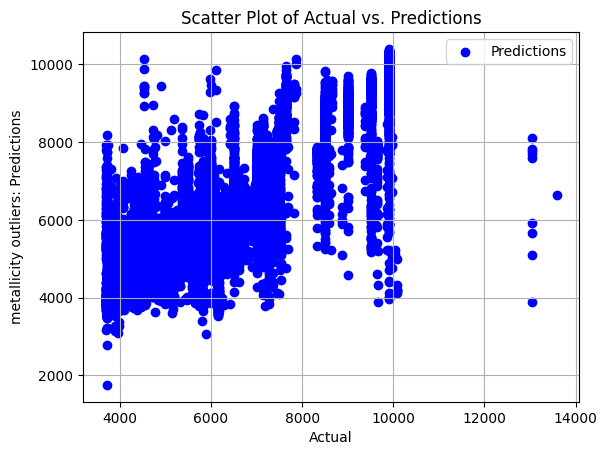

In [35]:
plt.scatter(y_test, predictions, c='b', marker='o', label='Predictions')

# Add labels and a 1:1 line for reference
plt.xlabel('Actual')
plt.ylabel('metallicity outliers: Predictions')
plt.plot(color='red', linestyle='--', label='1:1 Line')

# Add a legend
plt.legend()

# Show the plot
plt.title("Scatter Plot of Actual vs. Predictions")
plt.grid(True)
plt.show()

In [36]:
#for predicted y values of less than 100, find the associated input values
for i in range(len(predictions)):
    if predictions[i] < 100:
        print("Input:", X_test[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i])  # predictions[i] is a 2D array, so we access the value with [0]
        print()

In [80]:
# now let's try some pycaret stuff
!pip install pycaret pandas shap


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\zayaa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from pycaret.regression import *

In [29]:
# Initialize the regression setup
#for the data, we want to use color_filters_df, but ignore the columns 'anomalies_scores' and 'anomaly':

# new shiz, without .values
X = color_filters_df[['u_g', 'g_r', 'r_i', 'i_z','metallicity']]
# X = color_filters_df[['g_r', 'r_i']].values
y = color_filters_df['temperature']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#create a variable called train_set which is X_train and y_train concatenated
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

In [30]:


#do drop to remove those extra columns
regression_setup = setup(data=train_set, target='temperature')

# Compare the performance of different regression models
compare_models()

# Create a model using the best performing algorithm
best_model = create_model('lightgbm')

# Tune the hyperparameters of the model
tuned_model = tune_model(best_model)

# Evaluate the model on the test set
evaluate_model(tuned_model)

# Make predictions on new data
predictions = predict_model(tuned_model, data=X_test)


,Description,Value
0,Session id,2049
1,Target,temperature
2,Target type,Regression
3,Original data shape,"(324480, 6)"
4,Transformed data shape,"(324480, 6)"
5,Transformed train set shape,"(227136, 6)"
6,Transformed test set shape,"(97344, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,104.4214,88148.8416,296.4664,0.9403,0.0489,0.0178,4.6940
rf,Random Forest Regressor,105.0569,100390.4371,316.3944,0.9320,0.0525,0.0179,22.2630
lightgbm,Light Gradient Boosting Machine,164.5574,113594.4382,336.8153,0.9231,0.0569,0.0292,0.7780
gbr,Gradient Boosting Regressor,222.8299,171595.4430,414.1055,0.8838,0.0726,0.0406,7.2140
dt,Decision Tree Regressor,118.3782,195775.6712,442.2271,0.8674,0.0721,0.0199,0.8010
knn,K Neighbors Regressor,170.6068,219367.4991,468.1814,0.8514,0.0774,0.0298,0.6170
ada,AdaBoost Regressor,468.6820,531927.8473,728.4326,0.6395,0.1307,0.0924,1.1220
omp,Orthogonal Matching Pursuit,793.9366,1310284.3927,1132.2337,0.1134,0.1996,0.1509,0.4390
dummy,Dummy Regressor,877.5241,1476122.8330,1214.9315,-0.0000,0.2154,0.1683,0.4710
par,Passive Aggressive Regressor,430.4964,1745437.9128,1087.9649,-0.1907,0.1317,0.0729,0.4720


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,163.5523,114770.9605,338.7786,0.9214,0.0564,0.0290
1,163.6093,113229.8040,336.4964,0.9230,0.0566,0.0291
2,169.9963,131484.6190,362.6081,0.9122,0.0602,0.0301
3,162.4396,102952.1983,320.8616,0.9283,0.0545,0.0289
4,161.8413,108073.2297,328.7449,0.9267,0.0560,0.0288
5,166.8231,121183.8325,348.1147,0.9184,0.0586,0.0296
6,162.9897,112193.2459,334.9526,0.9255,0.0564,0.0289
7,163.9147,105738.5045,325.1746,0.9277,0.0563,0.0293
8,163.3538,105754.9681,325.1999,0.9284,0.0562,0.0291


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,155.0623,108448.3474,329.3150,0.9257,0.0546,0.0275
1,156.4915,108251.9517,329.0166,0.9264,0.0550,0.0277
2,161.9666,128884.5248,359.0049,0.9140,0.0594,0.0286
3,154.5211,97251.9236,311.8524,0.9323,0.0527,0.0274
4,154.0335,102877.0470,320.7445,0.9302,0.0543,0.0273
5,157.7842,116581.1717,341.4399,0.9215,0.0572,0.0280
6,154.6794,106496.7046,326.3383,0.9293,0.0547,0.0272
7,155.7970,99900.7313,316.0708,0.9317,0.0545,0.0278
8,156.9138,102011.9306,319.3931,0.9310,0.0550,0.0279


Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


ValueError: Plot Not Available. Please see docstring for list of available Plots.

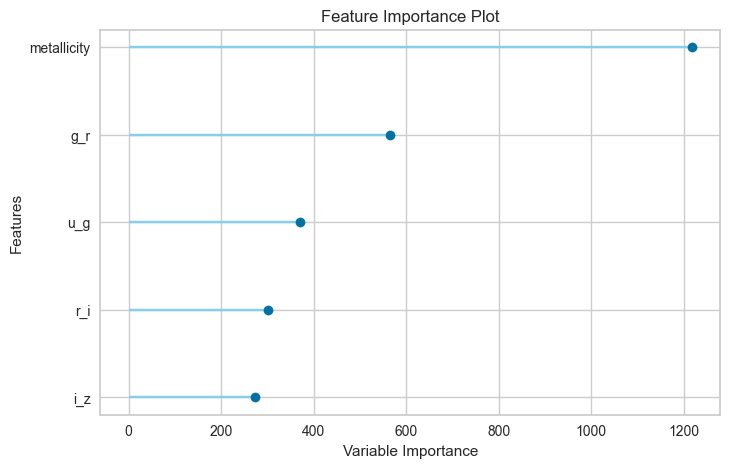

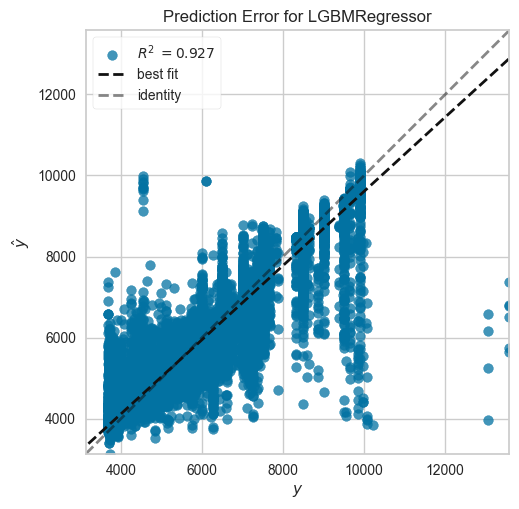

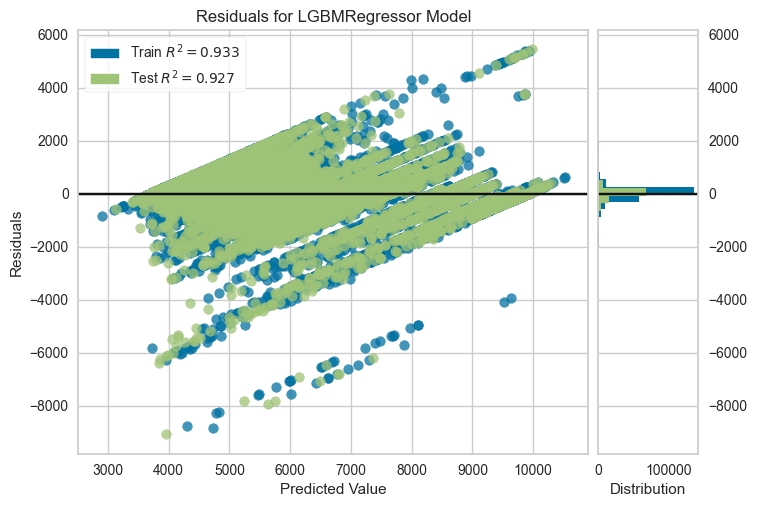

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\zayaa\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['u_g', 'g_r', 'r_i', 'i_z',
                                              'metallicity'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  LGBMRegressor(bagging_fraction=0.7, bagging_freq=7,
                                feature_fraction=1.0, learning_rate=0.15,
                                min_child_samples=26, min_split_gain=0,
                                n_estimators=70, n_jobs=-1, num_leaves=40,
                                random_state=2049, reg_alpha=0.3,
                                reg_lambda=0.0001))]),
 'regression_model.pkl')

In [47]:
# Visualize the predictions
plot_model(tuned_model, 'feature') #, plot='prediction_error')
plot_model(tuned_model, 'error')
plot_model(tuned_model, 'residuals')

# Save the model
save_model(tuned_model, 'regression_model')


In [42]:
#concatenate test_set['temperature'] and predictions['prediction_label'] into a dataframe:
print(test_set['temperature'], predictions['prediction_label'])

341859    6000
115091    5059
183690    6000
140109    5221
218750    5059
          ... 
127405    5935
113829    3858
253482    5625
135524    3717
354054    6500
Name: temperature, Length: 81120, dtype: int64 341859    6049.349309
115091    5073.870458
183690    6089.694275
140109    5236.292669
218750    5071.661649
             ...     
127405    5915.242334
113829    3867.587180
253482    5671.309763
135524    3729.945568
354054    6354.887034
Name: prediction_label, Length: 81120, dtype: float64


#take the top pycaret model, print its r2 value
print(tuned_model.score(X_train, y_train))
#and print test r2 value
print(tuned_model.score(X_test, y_test))